<a href="https://colab.research.google.com/github/sergope/tfm/blob/main/prophet_one_magnitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)

BASE_FOLDER = 'drive/My Drive/TFM/resources/'

Mounted at /content/drive/


In [ ]:
%run 'drive/My Drive/TFM/prophet_functions'.ipynb
%run 'drive/My Drive/TFM/plot_functions'.ipynb

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat  yhat_lower  yhat_upper
2510 2020-01-03  88.690263   44.642134  134.715750
2511 2020-01-04  77.474564   33.707057  122.769803
2512 2020-01-05  72.035540   26.792245  115.360398
2513 2020-01-06  78.490842   33.964222  125.868326
2514 2020-01-07  90.213108   45.652297  133.403637


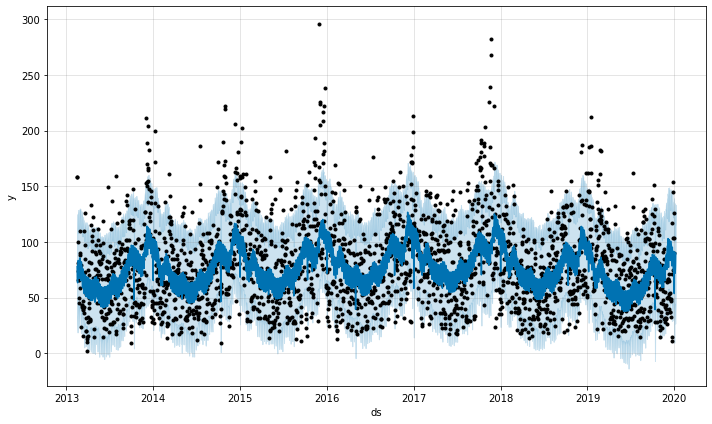

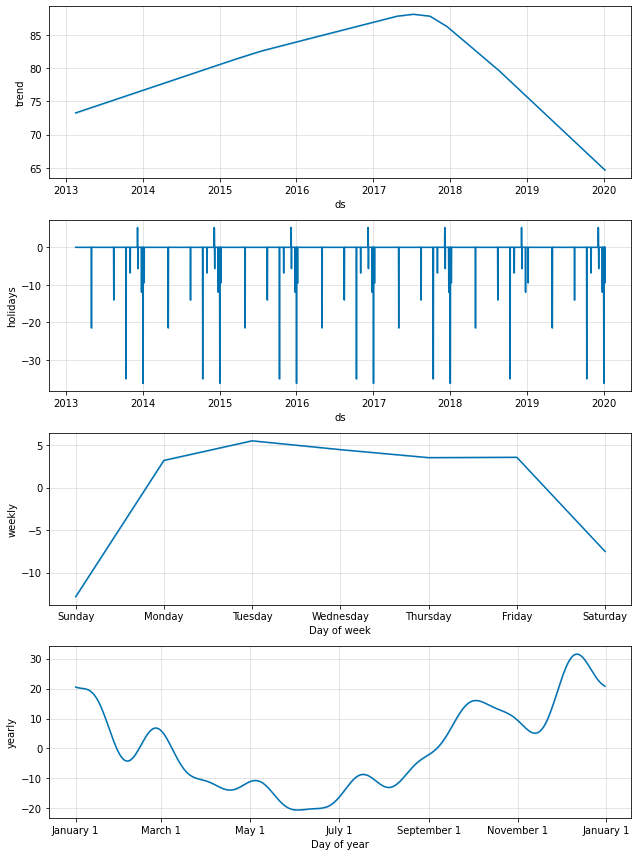

In [ ]:
file_name = 'getafe'
magnitude = 8
periods = 7
options = {
    "holidays": True,
    "cross_validations": False,
    "plot_figures": True,
    "figs_cross_validations": ['rmse'],
    "yearly_order": 10,
    "weekly_order": 10,
    }

result = predict_one_magnitude(file_name, magnitude, periods, options)

df = result['df']
forecast_df = result['forecast']

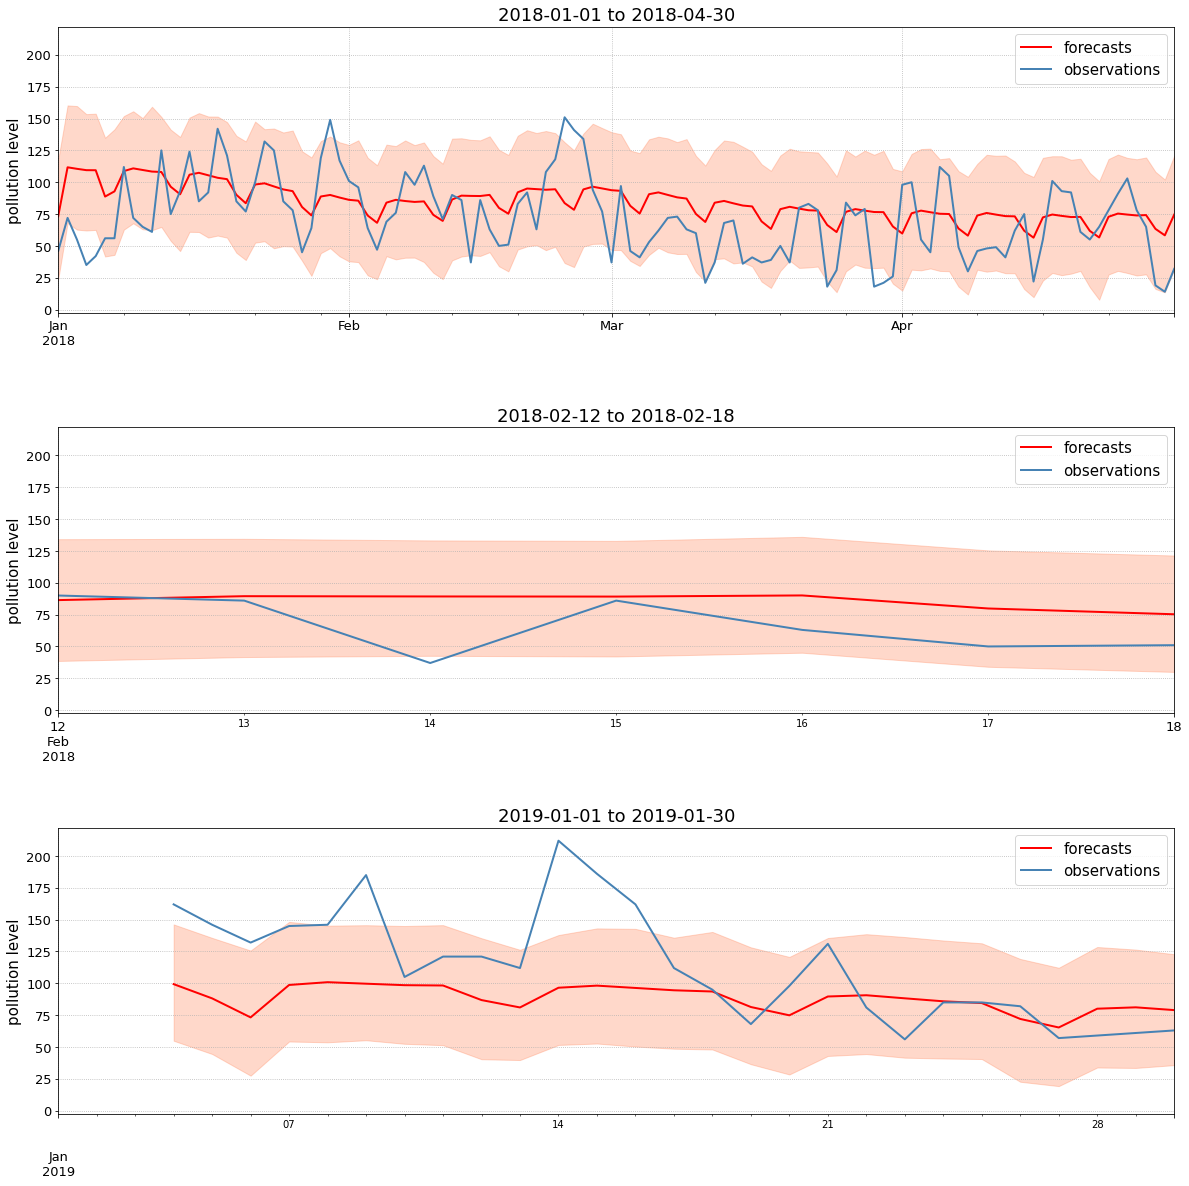

In [ ]:
df['ds'] = pd.to_datetime(forecast_df['ds'])

f, axes = plt.subplots(nrows=3, figsize=(20,20), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

ax = axes[0]

make_plot_block(df, forecast_df, '2018-01-01', '2018-04-30', ax=ax)

ax = axes[1]

make_plot_block(df, forecast_df, '2018-02-12', '2018-02-18', ax=ax)

ax = axes[2]

make_plot_block(df, forecast_df, '2019-01-01', '2019-01-30', ax=ax)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# merged_df['ds']
# forecast_df
merged_df = df

dates = pd.date_range(start = '2018-01-01', end = '2018-04-30', freq='D').strftime('%Y-%m-%d')
merge_dates = merged_df[merged_df['ds'].isin(list(dates))]
forecast_dates = forecast_df[forecast_df['ds'].isin(list(dates))]



y_actual = merge_dates['y']
y_predicted = forecast_dates['yhat']

# forecast_dates
rmse = sqrt(mean_squared_error(y_actual, y_predicted))
rmse

30.344496265403457

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 8 forecasts with cutoffs between 2015-07-20 00:00:00 and 2018-12-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fdec23a4f28>


             ds       yhat  yhat_lower  yhat_upper
2510 2020-01-03  87.889565   43.568285  138.385567
2511 2020-01-04  76.764905   31.448126  120.972906
2512 2020-01-05  71.431755   27.087293  115.033926
2513 2020-01-06  78.854451   34.642642  124.581852
2514 2020-01-07  89.933915   47.921066  135.253120
     horizon          mse       rmse        mae      mape     mdape  coverage
0    37 days  1255.336184  35.430724  28.041890  0.490431  0.288948  0.794796
1    38 days  1237.907136  35.183905  27.904546  0.487553  0.288948  0.798724
2    39 days  1269.686456  35.632660  28.323614  0.489629  0.307623  0.793814
3    40 days  1273.297255  35.683291  28.524832  0.497757  0.308835  0.792526
4    41 days  1291.752753  35.940962  28.846058  0.510354  0.320282  0.782216
..       ...          ...        ...        ...       ...       ...       ...
324 361 days  1768.591036  42.054620  34.754905  0.705048  0.450500  0.668385
325 362 days  1779.031998  42.178573  34.701288  0.698495  0.445239  0

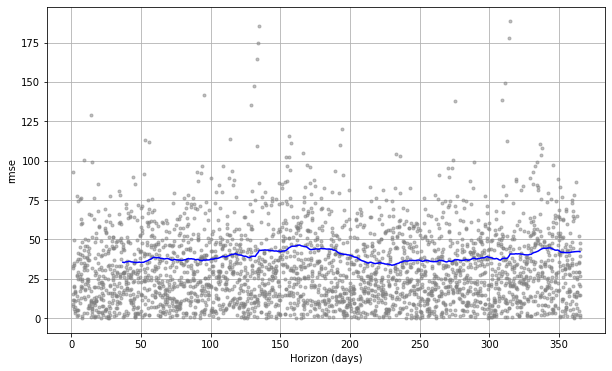

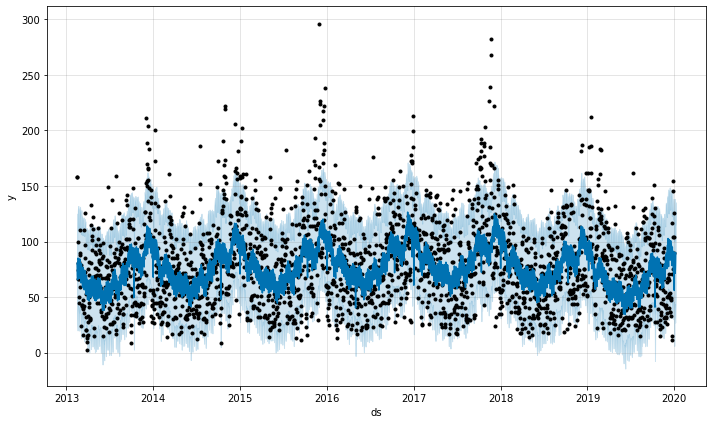

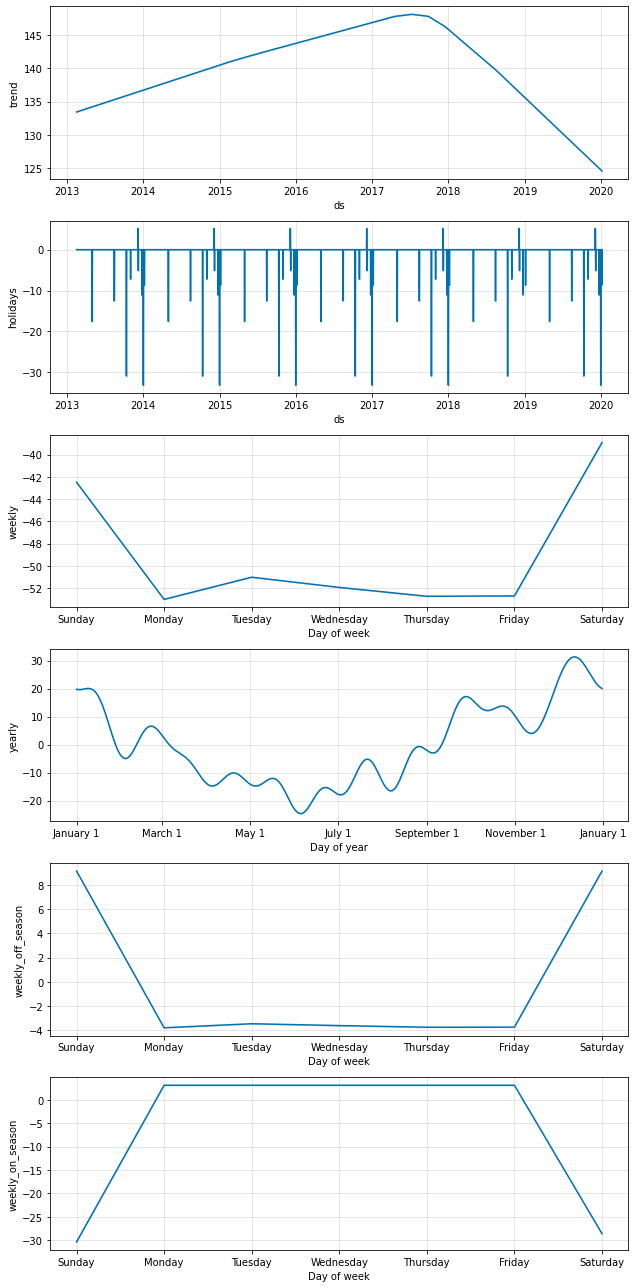

In [ ]:
file_name = 'getafe'
magnitude = 8
periods = 7
options = {
    "holidays": True,
    "cross_validations": True,
    "plot_figures": True,
    "figs_cross_validations": ['rmse'],
    "yearly_order": 12,
    "weekly_order": 20,
    }

result = predict_one_magnitude(file_name, magnitude, periods, options)

df = result['df']
forecast_df = result['forecast']

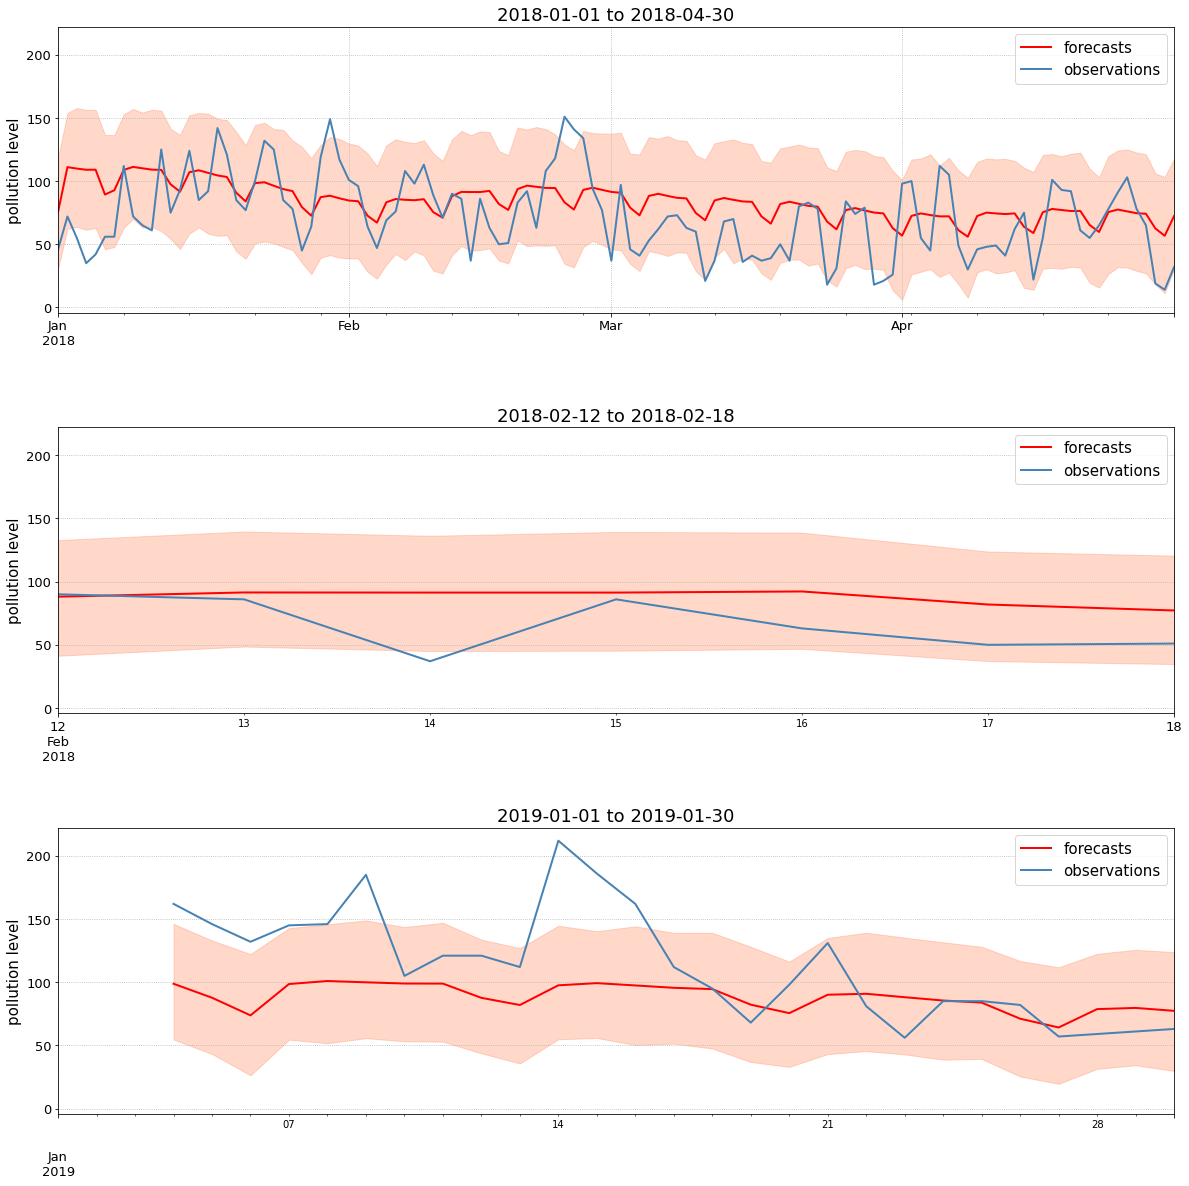

In [ ]:
df['ds'] = pd.to_datetime(forecast_df['ds'])

f, axes = plt.subplots(nrows=3, figsize=(20,20), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

ax = axes[0]

make_plot_block(df, forecast_df, '2018-01-01', '2018-04-30', ax=ax)

ax = axes[1]

make_plot_block(df, forecast_df, '2018-02-12', '2018-02-18', ax=ax)

ax = axes[2]

make_plot_block(df, forecast_df, '2019-01-01', '2019-01-30', ax=ax)